In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('cancer.csv')

In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [14]:
df.groupby(['age','year']).size().reset_index()

,age,year,0
0,30,62,1
1,30,64,1
2,30,65,1
3,31,59,1
4,31,65,1
...,...,...,...
220,75,62,1
221,76,67,1
222,77,65,1
223,78,65,1


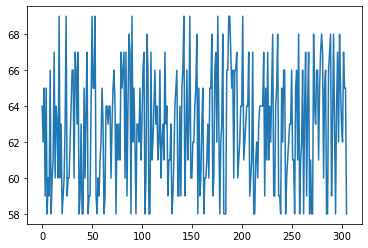

In [17]:
plt.plot(df['year'])

In [5]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


(None, (306, 4))

In [16]:
plt.show()

In [6]:
df.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
status=df['status'].value_counts(normalize=True)*100
status

1    73.529412
2    26.470588
Name: status, dtype: float64

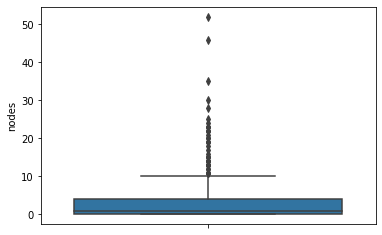

In [9]:
sns.boxplot(y=df['nodes'])

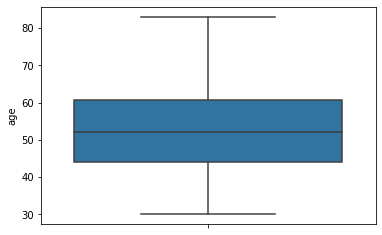

In [10]:
sns.boxplot(y=df['age'])

In [11]:
df_corr=df.corr()

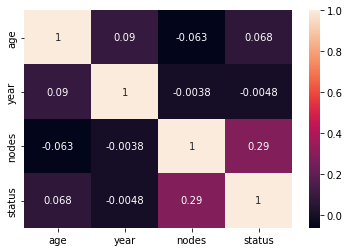

In [12]:
sns.heatmap(df_corr,annot=True)

In [13]:
label=status.keys().map({1:"survived",2:"not survived"})

([<matplotlib.patches.Wedge at 0x18c27fbf430>,
 [Text(-1.4821303443893803, 1.6258196831875968, 'survived'),
  Text(1.48213034438938, -1.6258196831875968, 'not survived')],
 [Text(-0.8084347333032983, 0.8868107362841436, '73.53%'),
  Text(0.8084347333032981, -0.8868107362841436, '26.47%')])

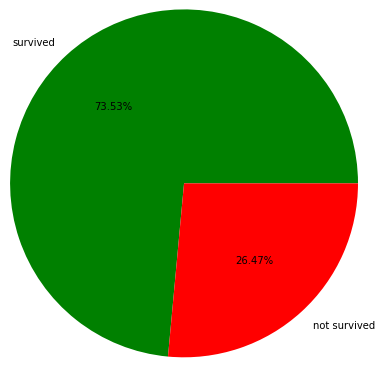

In [14]:
plt.pie(x=status,labels=label,colors=["green",'red'],radius=2,autopct='%1.2f%%')

In [15]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [16]:
x=df['status'].map({1:'survived',2:'not survived'})
x

0          survived
1          survived
2          survived
3          survived
4          survived
           ...     
301        survived
302        survived
303        survived
304    not survived
305    not survived
Name: status, Length: 306, dtype: object

In [17]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
v=pd.DataFrame(x)

In [19]:
v

,status
0,survived
1,survived
2,survived
3,survived
4,survived
...,...
301,survived
302,survived
303,survived
304,not survived


In [23]:
d=pd.concat([df,v],axis=1)
d

,age,year,nodes,status,status
0,30,64,1,1,survived
1,30,62,3,1,survived
2,30,65,0,1,survived
3,31,59,2,1,survived
4,31,65,4,1,survived
...,...,...,...,...,...
301,75,62,1,1,survived
302,76,67,0,1,survived
303,77,65,3,1,survived
304,78,65,1,2,not survived


In [21]:
d.columns=["age",'year','nodes','s','status']

In [62]:
d.head()

,age,year,nodes,s,status
0,30,64,1,1,survived
1,30,62,3,1,survived
2,30,65,0,1,survived
3,31,59,2,1,survived
4,31,65,4,1,survived


In [64]:
d.drop('s',axis=1)

,age,year,nodes,status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived
...,...,...,...,...
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,not survived


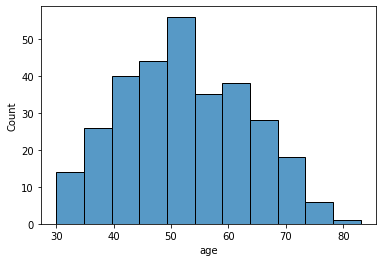

In [66]:
sns.histplot(df['age'])

In [144]:
x=df.drop('status',axis=1)
x.head()

,age,year,nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [145]:
y=df['status']

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
os=SMOTE()

In [150]:
x_res,y_res=os.fit_resample(x_train,y_train)

In [151]:
y_res.value_counts()

2    157
1    157
Name: status, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
lg=LogisticRegression()

In [154]:
lg.fit(x_train,y_train)

LogisticRegression()

In [155]:
y_pred=lg.predict(x_test)

In [156]:
y_test.head(),y_pred[0:5]

(262    1
 154    1
 234    1
 132    1
 63     2
 Name: status, dtype: int64,
 array([1, 1, 1, 1, 1], dtype=int64))

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y_test,y_pred)

array([[66,  2],
       [21,  3]], dtype=int64)

In [161]:
69/(69+21+2)

0.75

In [128]:
no_per_year=df['year'].value_counts()
case=pd.DataFrame(no_per_year)
case

,year
58,36
64,31
63,30
66,28
65,28
60,28
59,27
61,26
67,25
62,23


In [133]:
case=case.reset_index()

case

,index,year
0,58,36
1,64,31
2,63,30
3,66,28
4,65,28
5,60,28
6,59,27
7,61,26
8,67,25
9,62,23


In [141]:
case.columns=['year','no_of_cases']
case.head()

,year,no_of_cases
0,58,36
1,64,31
2,63,30
3,66,28
4,65,28


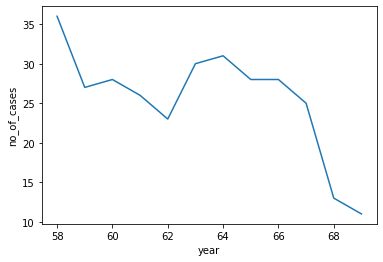

In [142]:
[sns.lineplot(x='year',y='no_of_cases',data=case)

In [162]:
df['status_flag']=df['status'].map({1:'survived',2:'not_survived'})

In [163]:
df.head()

,age,year,nodes,status,status_flag
0,30,64,1,1,survived
1,30,62,3,1,survived
2,30,65,0,1,survived
3,31,59,2,1,survived
4,31,65,4,1,survived


In [165]:
df["age_group"] = pd.cut(df["age"],bins=[29,40,50,60,70,80,90],labels=["30-40","40-50","50-60","60-70","70-80","80-90"])
df

,age,year,nodes,status,status_flag,age_group
0,30,64,1,1,survived,30-40
1,30,62,3,1,survived,30-40
2,30,65,0,1,survived,30-40
3,31,59,2,1,survived,30-40
4,31,65,4,1,survived,30-40
...,...,...,...,...,...,...
301,75,62,1,1,survived,70-80
302,76,67,0,1,survived,70-80
303,77,65,3,1,survived,70-80
304,78,65,1,2,not_survived,70-80


In [175]:
pivot=pd.pivot_table(df,values=['age'],index=['year','status_flag'],columns=['age_group'],
                    aggfunc='count',fill_value=0,margins=True)
pivot

age                                   
age_group         30-40 40-50 50-60 60-70 70-80 80-90  All
year status_flag                                          
58   not_survived     0     5     1     5     0     1   12
     survived         6     5     7     5     1     0   24
59   not_survived     1     2     5     1     0     0    9
     survived         4     6     3     5     0     0   18
60   not_survived     0     1     2     1     0     0    4
     survived         9     5     9     1     0     0   24
61   not_survived     0     0     1     2     0     0    3
     survived         1    10     7     5     0     0   23
62   not_survived     0     2     3     2     0     0    7
     survived         2     5     5     2     2     0   16
63   not_survived     0     4     2     1     1     0    8
     survived         5     8     5     3     1     0   22
64   not_survived     0     6     1     1     0     0    8
     survived         3     6    10     3     1     0   23
65   not_survived     0     3     6     2     2     0   13
     survived         3     5     2     4     1     0   15
66   not_survived     2     1     2     1     0     0    6
     survived         2     6     6     8     0     0   22
67   not_survived     0     3     0     1     0     0    4
     survived         3     5     7     4     2     0   21
68   not_survived     0     0     2     1     0     0    3
     survived         0     2     1     5     2     0   10
69   not_survived     1     2     1     0     0     0    4
     survived         1     1     5     0     0     0    7
All                  43    93    93    63    13     1  306

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfc=RandomForestClassifier()

In [179]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [180]:
y_pred=rfc.predict(x_test)

In [182]:
y_pred[0:5],y_test.head()

(array([1, 2, 2, 1, 2], dtype=int64),
 209    1
 262    1
 235    1
 87     1
 85     1
 Name: status, dtype: int64)

In [183]:
confusion_matrix(y_test,y_pred)

array([[59, 13],
       [12,  8]], dtype=int64)

In [184]:
#model3

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
dc=DecisionTreeClassifier()

In [238]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [239]:
y_pred=dc.predict(x_test)

In [240]:
y_pred[0:5],y_train.head()

(array([2, 2, 1, 1, 1], dtype=int64),
 255    1
 129    1
 73     2
 278    1
 157    2
 Name: status, dtype: int64)

In [241]:
confusion_matrix(y_test,y_pred)

array([[28,  9],
       [13, 12]], dtype=int64)

In [234]:
(29+13)/(29+8+13+12)

0.6774193548387096